# VGG16 

In [ ]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os.path
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2.12.0
Num GPUs Available:  0


In [ ]:
image_size = [224, 224]

In [ ]:
vgg = VGG16(input_shape = image_size + [3], weights = 'imagenet', include_top =  False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
from glob import glob
folders = glob('/content/drive/MyDrive/tomato_dataset')

In [ ]:
folders

['/content/drive/MyDrive/tomato_dataset']

In [ ]:
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(10, activation = 'softmax')(x)

In [ ]:
model = Model(inputs = vgg.input, outputs = prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data_gen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [ ]:
test_data_gen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_set = train_data_gen.flow_from_directory('/content/drive/MyDrive/tomato_dataset/train', target_size = (224,224), batch_size = 32, class_mode = 'categorical')

Found 1010 images belonging to 10 classes.


In [ ]:
test_set = test_data_gen.flow_from_directory('/content/drive/MyDrive/tomato_dataset/valid', target_size = (224,224), batch_size = 32, class_mode = 'categorical')

Found 610 images belonging to 10 classes.


Text(0.5, 1.0, 'Bacterial Spot')

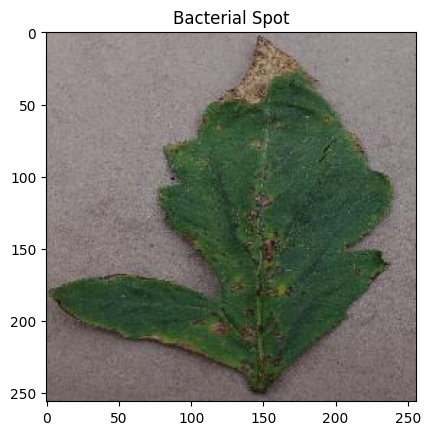

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("/content/drive/MyDrive/tomato_dataset/train/Tomato___Bacterial_spot/efce769f-3228-490a-b442-58a67d2ce349___GCREC_Bact.Sp 5868(1).JPG"))
plt.title("Bacterial Spot")

Text(0.5, 1.0, 'Early Blight')

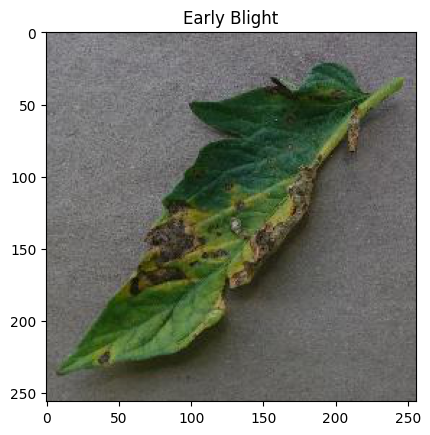

In [ ]:
plt.imshow(plt.imread("/content/drive/MyDrive/tomato_dataset/train/Tomato___Early_blight/f40b2786-1a17-46e6-b2cb-4ac1beb386fa___RS_Erly.B 6483_180deg.JPG"))
plt.title("Early Blight")

Text(0.5, 1.0, 'Late Blight')

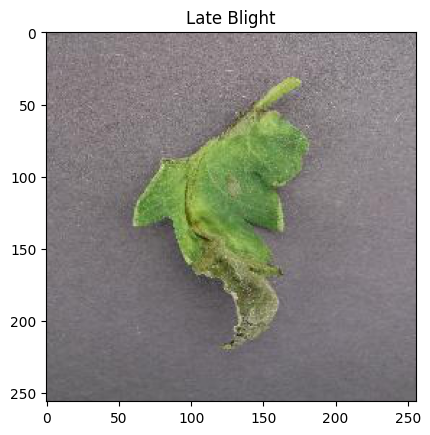

In [ ]:
plt.imshow(plt.imread("/content/drive/MyDrive/tomato_dataset/train/Tomato___Late_blight/e5d707cd-077c-43af-bda9-6138e516ff51___GHLB2 Leaf 8999.JPG"))
plt.title("Late Blight")

In [ ]:
mod = model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set)
)

<ipython-input-22-823b05d63134>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  mod = model.fit_generator(


Epoch 1/20
32/32 [==============================] - 985s 31s/step - loss: 1.7350 - accuracy: 0.4584 - val_loss: 2.8117 - val_accuracy: 0.3410
Epoch 2/20
32/32 [==============================] - 955s 30s/step - loss: 0.6829 - accuracy: 0.7832 - val_loss: 3.1024 - val_accuracy: 0.2770
Epoch 3/20
32/32 [==============================] - 951s 30s/step - loss: 0.4434 - accuracy: 0.8782 - val_loss: 3.1352 - val_accuracy: 0.3098
Epoch 4/20
32/32 [==============================] - 952s 30s/step - loss: 0.3228 - accuracy: 0.9099 - val_loss: 3.3632 - val_accuracy: 0.3131
Epoch 5/20
32/32 [==============================] - 952s 30s/step - loss: 0.2572 - accuracy: 0.9386 - val_loss: 3.5081 - val_accuracy: 0.3295
Epoch 6/20
32/32 [==============================] - 952s 30s/step - loss: 0.2137 - accuracy: 0.9475 - val_loss: 3.6510 - val_accuracy: 0.3164
Epoch 7/20
32/32 [==============================] - 906s 29s/step - loss: 0.1718 - accuracy: 0.9644 - val_loss: 3.7768 - val_accuracy: 0.3311
Epoch 

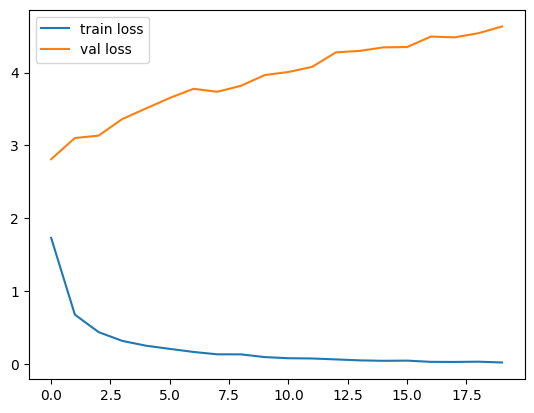

In [ ]:
import matplotlib.pyplot as plt
plt.plot(mod.history['loss'], label='train loss')
plt.plot(mod.history['val_loss'], label='val loss')
plt.legend()
plt.show()

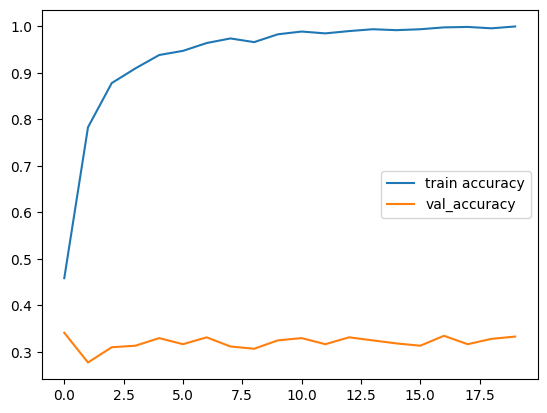

In [ ]:
plt.plot(mod.history['accuracy'], label='train accuracy')
plt.plot(mod.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [ ]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('model.h5')